In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import datetime
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [3]:
import os
import distutils.sysconfig
os.system('ln -sf /Applications/Wind\ API.app/Contents/python/WindPy.py' + ' ' + distutils.sysconfig.get_python_lib())
os.system('ln -sf ~/Library/Containers/com.wind.mac.api/Data/.Wind ~/.Wind')

1

In [4]:
from WindPy import w

w.start() # 默认命令超时时间为120秒，如需设置超时时间可以加入waitTime参数，例如waitTime=60,即设置命令超时时间为60秒 
w.isconnected() # 判断WindPy是否已经登录成功

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2024 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


True

In [5]:
startdate = '2022-01-18'
today = datetime.date.today().strftime('%Y-%m-%d') 
enddate = '2024-07-23'

中债估值

In [6]:
def b_d(data):
    y10 = data.Data[0]
    date = pd.to_datetime(data.Times)
    code = data.Codes * len(y10)
    
    data1 = pd.DataFrame({'date': date, '10y': y10, 'code': code})
    data1.set_index('date', inplace=True)
    
    return data1

In [7]:
errorcode, t10y = w.edb("S0059749", startdate, enddate, "Fill=Previous", usedf=True)
t10y.columns = ['10y']

活跃券

In [8]:
active_bond= pd.read_excel(r'10Y国债活跃切券历史(中介).xlsx')
active_bond= active_bond.sort_values(by='切券起始日').tail(11).reset_index(drop=True)

In [9]:
active_bond

,代码,简称,剩余期限,切券起始日,切券截止日,天数,期间均价,累计成交笔数,期间最高,期间最低
0,210017.IB,21附息国债17,7.63Y,2021-12-15,2022-03-21,97,2.791979,22713,2.8675,2.6650
1,220003.IB,22附息国债03,7.88Y,2022-03-22,2022-06-10,81,2.799439,15937,2.8525,2.7350
2,220010.IB,22附息国债10,8.12Y,2022-06-13,2022-09-16,96,2.732159,26721,2.8550,2.6050
3,220017.IB,22附息国债17,8.37Y,2022-09-19,2022-10-09,21,2.692533,2892,2.7700,2.6345
4,220019.IB,22附息国债19,8.42Y,2022-10-10,2022-12-20,72,2.790454,16515,2.9900,2.6350
5,220025.IB,22附息国债25,8.62Y,2022-12-21,2023-03-13,83,2.886758,8807,2.9400,2.8075
6,230004.IB,23附息国债04,8.9Y,2023-03-14,2023-06-12,91,2.782933,24068,2.8800,2.6775
7,230012.IB,23附息国债12,9.15Y,2023-06-13,2023-09-19,99,2.631269,47192,2.6925,2.5310
8,230018.IB,23附息国债18,9.4Y,2023-09-20,2023-12-22,94,2.674444,87943,2.7360,2.6000
9,230026.IB,23附息国债26,9.65Y,2023-12-25,2024-03-25,92,2.434130,140327,2.5930,2.2475


In [10]:
def b_d(data):
    y10=data.Data[0]
    date=pd.to_datetime(data.Times)
    code=data.Codes*len(y10)
    data1=pd.DataFrame({'':date,'10y':y10,'code':code})
    data1.set_index('',inplace=True) 
    return data1
start_day=[]
end_day=[]
codes=[]
for i, day_data in active_bond.iterrows():
    startday=day_data['切券起始日']
    endday=day_data['切券截止日']
    code=day_data['代码']
    start_day.append(startday)
    end_day.append(endday)
    codes.append(code)
end_day[-1]=enddate
start_day[0]=startdate
bond1= w.wsd(codes[0], "yield_cnbd", start_day[0], end_day[0], "credibility=1;TradingCalendar=NIB;Fill=Previous;PriceAdj=YTM")
bond2= w.wsd(codes[1], "yield_cnbd", start_day[1], end_day[1], "credibility=1;TradingCalendar=NIB;Fill=Previous;PriceAdj=YTM")
bond3= w.wsd(codes[2], "yield_cnbd", start_day[2], end_day[2], "credibility=1;TradingCalendar=NIB;Fill=Previous;PriceAdj=YTM")
bond4= w.wsd(codes[3], "yield_cnbd", start_day[3], end_day[3], "credibility=1;TradingCalendar=NIB;Fill=Previous;PriceAdj=YTM")
bond5= w.wsd(codes[4], "yield_cnbd", start_day[4], end_day[4], "credibility=1;TradingCalendar=NIB;Fill=Previous;PriceAdj=YTM")
bond6= w.wsd(codes[5], "yield_cnbd", start_day[5], end_day[5], "credibility=1;TradingCalendar=NIB;Fill=Previous;PriceAdj=YTM")
bond7= w.wsd(codes[6], "yield_cnbd", start_day[6], end_day[6], "credibility=1;TradingCalendar=NIB;Fill=Previous;PriceAdj=YTM")
bond8= w.wsd(codes[7], "yield_cnbd", start_day[7], end_day[7], "credibility=1;TradingCalendar=NIB;Fill=Previous;PriceAdj=YTM")
bond9= w.wsd(codes[8], "yield_cnbd", start_day[8], end_day[8], "credibility=1;TradingCalendar=NIB;Fill=Previous;PriceAdj=YTM")
bond10= w.wsd(codes[9], "yield_cnbd", start_day[9], end_day[9], "credibility=1;TradingCalendar=NIB;Fill=Previous;PriceAdj=YTM")
bond11= w.wsd(codes[10], "yield_cnbd", start_day[10], end_day[10], "credibility=1;TradingCalendar=NIB;Fill=Previous;PriceAdj=YTM")
# bond12= w.wsd(codes[11], "yield_cnbd", start_day[11], end_day[11], "credibility=1;TradingCalendar=NIB;Fill=Previous;PriceAdj=YTM")

In [11]:
bond1_10y=b_d(bond1)
bond2_10y=b_d(bond2)
bond3_10y=b_d(bond3)
bond4_10y=b_d(bond4)
bond5_10y=b_d(bond5)
bond6_10y=b_d(bond6)
bond7_10y=b_d(bond7)
bond8_10y=b_d(bond8)
bond9_10y=b_d(bond9)
bond10_10y=b_d(bond10)
bond11_10y=b_d(bond11)
# bond12_10y=b_d(bond12)
bond_10y=pd.concat([bond1_10y,bond2_10y,bond3_10y,bond4_10y,bond5_10y,bond6_10y,bond7_10y,bond8_10y,bond9_10y,bond10_10y,bond11_10y])

改为周频数据

In [12]:
def get_10y(t10y, startdate, enddate):
    # 创建时间序列
    timeline = pd.DataFrame({'date': pd.date_range(start=startdate, end=enddate)})
    timeline.set_index('date', inplace=True, drop=False)
    
    # 合并并填充缺失值
    timeline = timeline.join(t10y).ffill()
    timeline['weekday'] = timeline.index.weekday
    timeline['week'] = timeline['weekday'].eq(1).cumsum() - 1  # 周二标记并累加
    
    # 获取周二的数据
    timeline_filtered = timeline[timeline['weekday'] == 1]
    
    # 添加最后一行数据
    timeline_filtered = pd.concat([timeline_filtered, timeline.iloc[[-1]]])
    
    # 计算下周的10年期数据并判断涨跌
    timeline_filtered['10y_next'] = timeline_filtered['10y'].shift(-1)
    timeline_filtered['y_true'] = (timeline_filtered['10y'] < timeline_filtered['10y_next']).astype(int)
    timeline_filtered.set_index('week', inplace=True)
    timeline_filtered = timeline_filtered.drop(columns={'weekday'})
    
    return timeline_filtered.iloc[:-1]


In [13]:
y = get_10y(t10y, startdate, enddate)

In [14]:
y_bond=get_10y(bond_10y, startdate, enddate)
y_bond['re']=0
y_bond["closeday"] = 0
y_bond["close_last_rate"] = 0
y_bond["open_new_rate"] = 0

基本面数据

In [15]:
# 定义函数来获取基本面指标数据并进行处理
def get_weekdata(startdate, enddate):
    indicators = ["S5133868", "S5133876", "Q0149884", "S5714810", "S5714813", "S5711217",
                  "S5713307", "S5133391", "S6124650", "S6124651", "S5446147", "S5446148",
                  "S6126413", "S5471265", "Z0164070", "S0000293", "S5446169", "V5932139",
                  "A5938607", "S5713337", "S5449386", "S2726996", "S2726992", "S2707388",
                  "S0000066", "S0114089", "S5065106", "S0031525"]
    
    errorcode, weekdata = w.edb(",".join(indicators), startdate, enddate, usedf=True)
    
    rename_columns = {
        'S5133868': '中国:库存:炼焦煤:国内样本钢厂(247家)',
        'S5133876': '中国:平均可用天数:炼焦煤:国内样本钢厂(247家)',
        'Q0149884': '中国:日耗量:煤炭重点电厂',
        'S5714810': '中国:总库存:烧结粉矿(进口)',
        'S5714813': '中国:总库存:烧结粉矿(国产)',
        'S5711217': '中国:高炉开工率:唐山',
        'S5713307': '中国:产量:螺纹钢:主要钢厂',
        'S5133391': '中国:开工率:产能(>200万吨):焦化企业(230家)',
        'S6124650': '中国:开工率:汽车轮胎(全钢胎)',
        'S6124651': '中国:开工率:汽车轮胎(半钢胎)',
        'S5446147': '中国:产量:精对苯二甲酸',
        'S5446148': '中国:开工率:精对苯二甲酸',
        'S6126413': '中国:日均销量(厂家零售):乘用车',
        'S5471265': '中国:社会库存:聚氯乙烯',
        'Z0164070': '中国:执行航班:国内航班(不含港澳台)',
        'S0000293': '义乌中国小商品指数:总价格指数',
        'S5446169': '中国:库存天数:精对苯二甲酸',
        'V5932139': '中国:库容比:水泥:当周值',
        'A5938607': '中国:表观需求:螺纹钢',
        'S5713337': '中国:库存:螺纹钢:主要建筑钢材生产企业',
        'S5449386': '中国:开工率:石油沥青装置',
        'S2726996': '中国:100大中城市:成交土地溢价率:当周值',
        'S2726992': '中国:100大中城市:成交土地占地面积:当周值',
        'S2707388': '中国:30大中城市:商品房成交面积:当周值',
        'S0000066': '中国出口集装箱运价指数:综合指数CCFI',
        'S0114089': '上海出口集装箱运价指数:综合指数SCFI',
        'S5065106': '中国:平均批发价:猪肉',
        'S0031525': '期货结算价(连续):布伦特原油'
    }
    
    weekdata.rename(columns=rename_columns, inplace=True)
    return weekdata

# 获取和处理数据
weekdata = get_weekdata(startdate, enddate)

In [16]:
timeline = {'date': pd.date_range(start=startdate, end=enddate)}
timeline = pd.DataFrame(timeline)
timeline.set_index('date', inplace=True)
timeline = timeline.join(weekdata)
timeline['date'] = timeline.index
def get_weekday(date):
    return ['周一', '周二', '周三', '周四', '周五', '周六', '周日'][date.weekday()]
timeline['weekday'] = timeline['date'].apply(get_weekday)
num = 1
for index, row in timeline.iterrows():
    if row['weekday'] == '周二':
        timeline.loc[index, 'week'] = num
        num += 1
timeline.week.ffill(inplace=True)
#供给都喜欢用库存、平均可用数、日耗量、产量、开工率
#供给：煤炭，
X_fundamental_1 = timeline.groupby('week')[['中国:库存:炼焦煤:国内样本钢厂(247家)']].mean()
X_fundamental_2 = timeline.groupby('week')[['中国:平均可用天数:炼焦煤:国内样本钢厂(247家)']].mean()
#电力
X_fundamental_3 = timeline.groupby('week')[['中国:日耗量:煤炭重点电厂']].mean()
#铁矿
X_fundamental_4 = timeline.groupby('week')[['中国:总库存:烧结粉矿(进口)']].mean()
X_fundamental_5 = timeline.groupby('week')[['中国:总库存:烧结粉矿(国产)']].mean()
#钢铁
X_fundamental_6 = timeline.groupby('week')[['中国:高炉开工率:唐山']].mean()
X_fundamental_7 = timeline.groupby('week')[['中国:产量:螺纹钢:主要钢厂']].mean()
#化工
X_fundamental_8 = timeline.groupby('week')[['中国:开工率:产能(>200万吨):焦化企业(230家)']].mean()
#汽车
X_fundamental_9 = timeline.groupby('week')[['中国:开工率:汽车轮胎(全钢胎)']].mean()
X_fundamental_10 = timeline.groupby('week')[['中国:开工率:汽车轮胎(半钢胎)']].mean()#还可以用全钢胎
#纺织
X_fundamental_11 = timeline.groupby('week')[['中国:产量:精对苯二甲酸']].mean()
X_fundamental_12 = timeline.groupby('week')[['中国:开工率:精对苯二甲酸']].mean()

###########消费############还可以再加一个居民生活半径——9大城市的客运量
#汽车：销量
X_fundamental_13 = timeline.groupby('week')[['中国:日均销量(厂家零售):乘用车']].mean()
#化工，PVC库存
X_fundamental_14 = timeline.groupby('week')[['中国:社会库存:聚氯乙烯']].mean()
#商务活动半径，架次
X_fundamental_15 = timeline.groupby('week')[['中国:执行航班:国内航班(不含港澳台)']].mean()
#小商品
X_fundamental_16 = timeline.groupby('week')[['义乌中国小商品指数:总价格指数']].mean()
#纺织 PTA
X_fundamental_17 = timeline.groupby('week')[['中国:库存天数:精对苯二甲酸']].mean()

##############投资#######################################################################
#建材：水泥库容比、螺纹钢
X_fundamental_18 = timeline.groupby('week')[['中国:库容比:水泥:当周值']].mean()
X_fundamental_19 = timeline.groupby('week')[['中国:表观需求:螺纹钢']].mean()
X_fundamental_20 = timeline.groupby('week')[['中国:库存:螺纹钢:主要建筑钢材生产企业']].mean()

#####基建
X_fundamental_21 = timeline.groupby('week')[['中国:开工率:石油沥青装置']].mean()

###########地产
X_fundamental_22 = timeline.groupby('week')[['中国:100大中城市:成交土地溢价率:当周值']].mean()
X_fundamental_23 = timeline.groupby('week')[['中国:100大中城市:成交土地占地面积:当周值']].mean()
X_fundamental_24 = timeline.groupby('week')[['中国:30大中城市:商品房成交面积:当周值']].mean()

###############################出口#####################################还可以用吞吐量，价格，国外景气度
############出口运价
X_fundamental_25 = timeline.groupby('week')[['中国出口集装箱运价指数:综合指数CCFI']].mean()
X_fundamental_26 = timeline.groupby('week')[['上海出口集装箱运价指数:综合指数SCFI']].mean()

###############################价格###############################
#CPI
X_fundamental_27 = timeline.groupby('week')[['中国:平均批发价:猪肉']].mean()
#PPI
X_fundamental_28 = timeline.groupby('week')[['期货结算价(连续):布伦特原油']].mean()

X_fundamental = X_fundamental_1.join([X_fundamental_2,X_fundamental_3,X_fundamental_4,X_fundamental_5,X_fundamental_6,X_fundamental_7,X_fundamental_8,X_fundamental_9,X_fundamental_10,X_fundamental_11,X_fundamental_12,X_fundamental_13,X_fundamental_14,X_fundamental_15,X_fundamental_16,X_fundamental_17,X_fundamental_18,X_fundamental_19,X_fundamental_20,X_fundamental_21,X_fundamental_22,X_fundamental_23,X_fundamental_24,X_fundamental_25,X_fundamental_26,X_fundamental_27,X_fundamental_28])
X_fundamental

,中国:库存:炼焦煤:国内样本钢厂(247家),中国:平均可用天数:炼焦煤:国内样本钢厂(247家),中国:日耗量:煤炭重点电厂,中国:总库存:烧结粉矿(进口),中国:总库存:烧结粉矿(国产),中国:高炉开工率:唐山,中国:产量:螺纹钢:主要钢厂,中国:开工率:产能(>200万吨):焦化企业(230家),中国:开工率:汽车轮胎(全钢胎),中国:开工率:汽车轮胎(半钢胎),...,中国:表观需求:螺纹钢,中国:库存:螺纹钢:主要建筑钢材生产企业,中国:开工率:石油沥青装置,中国:100大中城市:成交土地溢价率:当周值,中国:100大中城市:成交土地占地面积:当周值,中国:30大中城市:商品房成交面积:当周值,中国出口集装箱运价指数:综合指数CCFI,上海出口集装箱运价指数:综合指数SCFI,中国:平均批发价:猪肉,期货结算价(连续):布伦特原油
week,,,,,,,,,,,,,,,,,,,,,
1.0,1067.57,17.48,563.7,NaN,NaN,76.13,263.69,82.62,52.13,55.01,...,218.22,178.56,29.8,3.89,2435.0224,351.361924,3555.24,5053.12,21.812000,87.6980
2.0,1089.61,17.59,NaN,1754.41,126.35,73.43,260.61,81.38,20.15,39.98,...,147.77,191.16,31.7,2.47,2863.8638,353.417903,3565.33,5010.36,21.871667,89.7480
3.0,1081.36,17.46,NaN,NaN,NaN,58.56,NaN,79.58,2.65,14.16,...,NaN,NaN,NaN,0.92,39.7471,21.974125,NaN,NaN,22.380000,91.1400
4.0,991.08,16.57,449.7,1644.00,128.29,52.51,244.05,75.48,9.25,20.11,...,NaN,325.39,27.1,4.91,1018.7986,188.895492,3587.91,4980.93,21.098000,92.9320
5.0,951.76,15.83,519.0,1678.22,121.92,57.57,255.92,72.68,33.05,36.18,...,164.10,316.01,25.0,3.63,1494.7801,283.036189,3500.19,4946.01,19.844000,93.9980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128.0,749.15,11.99,478.0,1115.07,90.91,93.53,244.83,77.25,62.46,79.31,...,235.86,206.42,25.7,3.71,2337.4134,397.401709,1922.46,3714.32,24.308000,85.9320
129.0,744.05,11.91,454.0,1097.35,95.17,92.08,236.68,77.79,62.20,79.39,...,234.82,200.73,24.6,1.64,997.6163,191.080809,2011.33,3733.80,24.326000,86.6600
130.0,743.76,11.86,511.0,1128.60,97.54,90.17,227.16,77.89,58.97,79.24,...,235.42,194.05,25.2,5.00,1136.8276,172.227741,2085.05,3674.86,24.606000,85.0040


市场面数据

In [17]:
# 获取市场面指标数据并进行重命名
def get_dailydata(startdate, enddate):
    indicators = ["M0017142", "M0048499", "M0048486", "M1001795", "M1006337", "M1000527", 
                  "M1000529", "M1000530", "M0342074", "S0059776", "M0000271", "M0000185", 
                  "M0067855"]
    errorcode, dailydata = w.edb(",".join(indicators), startdate, enddate, usedf=True)
    rename_columns = {
        'M0017142': 'shibor3m', 'M0048499': 'shibor_irs', 'M0048486': 'fr007_irs', 
        'M1001795': 'R007', 'M1006337': 'DR007', 'M1000527': 'note1m', 'M1000529': 'note3m', 
        'M1000530': 'note6m', 'M0342074': 'pe_ratio', 'S0059776': 'corpbond', 'M0000271': 'dxy', 
        'M0000185': 'usdrmb', 'M0067855': 'usdrmb_close'
    }
    dailydata.rename(columns=rename_columns, inplace=True)
    dailydata['FED'] = 1 / dailydata['pe_ratio'] / dailydata['corpbond']
    return dailydata
dailydata = get_dailydata(startdate, enddate)

In [18]:
# 赫尔普滤波器
def hp_filter(y, lamb=10):
    def D_matrix(N):
        D = np.eye(N) - np.eye(N, k=-1)
        return D[:-1]
    
    N = len(y)
    D1 = D_matrix(N)
    D2 = D_matrix(N-1)
    D = D2 @ D1
    return np.linalg.inv(np.eye(N) + lamb * D.T @ D) @ y

# 处理并转换R007和DR007
def process_lvbo_data(dailydata):
    lvbo = dailydata[['R007', 'DR007']].dropna().sort_index(ascending=False)

    g1 = hp_filter(lvbo['DR007'], 1000)
    g2 = hp_filter(lvbo['R007'], 1000)
    
    result2 = pd.DataFrame({'DR007_lvbo': g1, 'R007_lvbo': g2}, index=lvbo.index)
    result2['date'] = pd.to_datetime(result2.index)
    result2.sort_values('date', inplace=True)
    
    return result2

# 创建并处理时间线数据
def create_timeline(startdate, enddate, dailydata, result2):
    timeline = pd.DataFrame({'date': pd.date_range(start=startdate, end=enddate)})
    timeline.set_index('date', inplace=True)
    dailydata = dailydata.join(result2)
    dailydata.drop(['date', 'pe_ratio', 'corpbond', 'R007', 'DR007'], axis=1, inplace=True)
    timeline = timeline.join(dailydata)
    timeline.ffill(inplace=True)
    
    for column in timeline.columns:
        if timeline[column].isnull().iloc[0]:
            first_valid_index = timeline[column].first_valid_index()
            if first_valid_index is not None:
                timeline[column].iloc[0] = timeline[column].loc[first_valid_index]
                
    timeline['weekday'] = timeline.index.weekday
    timeline['week'] = timeline['weekday'].eq(1).cumsum()
    timeline['week'].ffill(inplace=True)
    
    return timeline

# 计算周平均值
def calculate_weekly_means(timeline, columns):
    return timeline.groupby('week')[columns].mean()

result2 = process_lvbo_data(dailydata)
timeline = create_timeline(startdate, enddate, dailydata, result2)

# 选择需要计算周平均值的列
market_columns = [
    'shibor3m', 'shibor_irs', 'fr007_irs', 'R007_lvbo', 'DR007_lvbo', 'note3m', 'note6m', 
    'FED', 'dxy', 'usdrmb', 'usdrmb_close'
]

# 计算周平均值
X_market = calculate_weekly_means(timeline, market_columns)

X_market


,shibor3m,shibor_irs,fr007_irs,R007_lvbo,DR007_lvbo,note3m,note6m,FED,dxy,usdrmb,usdrmb_close
week,,,,,,,,,,,
1,2.472857,2.394071,2.108343,2.346712,2.090384,2.439286,2.484014,0.019967,95.703200,6.350243,6.342386
2,2.458000,2.406314,2.097457,2.305009,2.085568,2.442257,2.472786,0.020729,96.856043,6.357571,6.352286
3,2.455714,2.395400,2.091129,2.267715,2.082604,2.448429,2.477786,0.020936,95.628300,6.372229,6.362771
4,2.436714,2.452071,2.131057,2.214017,2.075902,2.396300,2.436114,0.020302,95.888543,6.364686,6.360871
5,2.403286,2.484243,2.164357,2.197168,2.084455,2.385271,2.405029,0.020002,96.010543,6.340271,6.333171
...,...,...,...,...,...,...,...,...,...,...,...
128,1.918429,1.934271,1.838300,1.994463,1.884610,1.934486,1.958486,0.034017,105.850143,7.125886,7.266343
129,1.910286,1.945300,1.863400,1.637381,1.553002,1.890229,1.933857,0.033951,105.117543,7.129443,7.269514
130,1.901571,1.931371,1.851814,0.989819,0.946793,1.887729,1.944986,0.033681,104.448771,7.132129,7.265300


技术面

In [19]:
# # 获取市场数据
errorcode, dailybond = w.edb("S0059749", startdate, enddate, "Fill=Previous", usedf=True)

# # 获取交易量数据
# errorcode, volumn_df = w.wsd("TB10Y.WI", "volume", startdate, enddate, "TradingCalendar=NIB;Fill=Previous", usedf=True)

In [20]:
# MA 趋势指标
def ma(data,w):
    result=[]
    for i in range(len(data)-w+1):
        ave=0
        for j in range(w):
            ave+=data[i+j]
        ave/=w
        result.append(ave)
    return result
tbond = dailybond.fillna(0)
ma5 = [0] * 4 + ma(tbond['CLOSE'],5)
ma10 = [0] * 9 + ma(tbond['CLOSE'],10)
ma20 = [0] * 19 + ma(tbond['CLOSE'],20)
df = pd.DataFrame({'ma5': ma5, 'ma10': ma10, 'ma20': ma20}, index = tbond.index)
df.replace(0, np.nan, inplace=True)
tbond = tbond.join(df)

# Aroon 动量指标
n = 25
high_max_index = tbond['CLOSE'].rolling(n).apply(lambda x: np.argmax(x), raw=True)
low_min_index = tbond['CLOSE'].rolling(n).apply(lambda x: np.argmin(x), raw=True)
aroon_up = (high_max_index+1) / n * 100
aroon_down = (low_min_index+1) / n * 100
tbond['Aroon_Up'] = aroon_up
tbond['Aroon_Down'] = aroon_down

# MACD 震荡指标
tbond['short'] = tbond['CLOSE'].ewm(span=12, adjust=False).mean()
tbond['long'] = tbond['CLOSE'].ewm(span=26, adjust=False).mean()
tbond['DIF'] = tbond['short'] - tbond['long']
tbond['DEA'] = tbond['DIF'].ewm(span=9, adjust=False).mean()
tbond['MACD'] = (tbond['DIF'] - tbond['DEA'])*2

# Momentum Indicator
tbond['momentum1'] = tbond['CLOSE'].diff(periods=1)
tbond['momentum2'] = tbond['CLOSE'].diff(periods=2)
tbond['momentum4'] = tbond['CLOSE'].diff(periods=4)

# RSI 超买超卖指标
lc = tbond['CLOSE'].shift(1)
diff = tbond['CLOSE'] - lc
up = diff.where(diff > 0, 0)
down = -diff.where(diff < 0, 0)
ema_up = up.ewm(alpha=1/14, adjust=False).mean()
ema_down = down.ewm(alpha=1/14, adjust=False).mean()
rs = ema_up / ema_down
tbond['RSI'] = 100 - 100 / (1 + rs)
tbond.drop(['CLOSE','short','long','DIF','DEA'],axis=1,inplace=True)

timeline = {'date': pd.date_range(start=startdate, end=enddate)}
timeline = pd.DataFrame(timeline)
timeline.set_index('date', inplace=True)
timeline = timeline.join(tbond)
timeline['date'] = timeline.index
timeline['weekday'] = timeline['date'].apply(get_weekday)
num = 1
for index, row in timeline.iterrows():
    if row['weekday'] == '周二':
        timeline.loc[index, 'week'] = num
        num += 1
timeline.week.ffill(inplace=True)
timeline.ffill(inplace=True)
timeline = timeline[timeline.weekday == '周一']

timeline.set_index('week',inplace=True)
timeline.drop(['weekday','date'],axis=1,inplace=True)
X_tech = timeline.copy()
X_tech

,ma5,ma10,ma20,Aroon_Up,Aroon_Down,MACD,momentum1,momentum2,momentum4,RSI
week,,,,,,,,,,
1.0,2.71702,NaN,NaN,NaN,NaN,-0.011353,-0.0349,-0.0520,-0.0664,0.000000
2.0,2.71050,2.70940,NaN,NaN,NaN,-0.005056,-0.0016,-0.0024,-0.0149,38.554002
3.0,2.71270,2.70882,NaN,NaN,NaN,-0.001334,0.0259,0.0243,-0.0092,50.549826
4.0,2.75584,2.73427,NaN,NaN,NaN,0.019384,0.0127,0.0690,0.0791,71.556412
5.0,2.79868,2.77726,2.743040,NaN,NaN,0.020259,0.0325,0.0501,0.0332,72.183645
...,...,...,...,...,...,...,...,...,...,...
127.0,2.24866,2.25829,2.273055,8.0,88.0,-0.005645,-0.0120,0.0006,-0.0086,36.750826
128.0,2.22400,2.23633,2.256025,4.0,96.0,-0.004819,0.0428,0.0405,0.0136,46.427858
129.0,2.25910,2.24155,2.249920,100.0,76.0,0.013698,0.0150,0.0402,0.0535,59.873317


In [21]:
X_raw = X_fundamental.join([X_market,X_tech])

In [22]:
X_raw.ffill(inplace=True)
X_combined = X_raw.diff()
X_combined = X_combined.dropna()

In [23]:
X_combined

,中国:库存:炼焦煤:国内样本钢厂(247家),中国:平均可用天数:炼焦煤:国内样本钢厂(247家),中国:日耗量:煤炭重点电厂,中国:总库存:烧结粉矿(进口),中国:总库存:烧结粉矿(国产),中国:高炉开工率:唐山,中国:产量:螺纹钢:主要钢厂,中国:开工率:产能(>200万吨):焦化企业(230家),中国:开工率:汽车轮胎(全钢胎),中国:开工率:汽车轮胎(半钢胎),...,ma5,ma10,ma20,Aroon_Up,Aroon_Down,MACD,momentum1,momentum2,momentum4,RSI
week,,,,,,,,,,,,,,,,,,,,,
8.0,-8.35,0.11,0.0,-51.85,-6.41,-13.96,6.28,0.60,4.46,11.61,...,0.00064,0.01308,0.014955,32.0,-12.0,-0.011347,-0.0226,-0.0651,-0.0700,-15.051647
9.0,-18.44,-0.71,-33.1,50.16,14.35,26.44,4.31,2.90,-9.90,-2.80,...,-0.01448,-0.00692,0.000625,-20.0,76.0,0.000240,0.0425,0.1076,0.0549,9.498961
10.0,-30.58,-0.38,0.0,-74.97,-5.65,-7.39,10.15,1.98,4.51,2.95,...,0.00944,-0.00252,0.005280,-20.0,-20.0,0.000819,-0.0269,-0.0400,-0.0349,-6.157528
11.0,-28.16,-0.56,0.0,-33.56,-3.78,2.39,-7.65,-0.20,2.68,2.37,...,-0.03280,-0.01168,-0.009300,-20.0,-20.0,-0.004186,0.0040,-0.0015,0.0260,-3.599434
12.0,-2.56,-0.05,-72.2,12.10,-13.26,5.78,6.40,-0.63,-9.80,-7.41,...,-0.01940,-0.02421,-0.014495,-16.0,52.0,0.000540,0.0180,0.0450,0.0105,1.710063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128.0,-5.36,-0.05,0.0,-30.06,-1.52,0.00,14.25,0.07,4.29,0.25,...,-0.02466,-0.02196,-0.017030,-4.0,8.0,0.000826,0.0548,0.0399,0.0222,9.677033
129.0,-5.10,-0.08,-24.0,-17.72,4.26,-1.45,-8.15,0.54,-0.26,0.08,...,0.03510,0.00522,-0.006105,96.0,-20.0,0.018517,-0.0278,-0.0003,0.0399,13.445459
130.0,-0.29,-0.05,57.0,31.25,2.37,-1.91,-9.52,0.10,-3.23,-0.15,...,0.00486,0.01998,-0.000990,-20.0,-20.0,-0.006450,-0.0213,-0.0509,-0.0692,-12.345318


In [24]:
y.dropna(inplace=True)
y['y_true'] = y['y_true'].astype('int64')
y_train_dataset = y.loc[X_combined.index[:-1],'y_true']
y_train_dataset

week
8      1
9      0
10     0
11     0
12     1
      ..
127    1
128    1
129    0
130    0
131    0
Name: y_true, Length: 124, dtype: int64

In [25]:
y_bond.dropna(inplace=True)
y_bond['y_true'] = y_bond['y_true'].astype('int64')
y_train_dataset_bond = y_bond.loc[X_combined.index[:-1],'y_true']
y_train_dataset_bond

week
8      1
9      0
10     0
11     0
12     1
      ..
127    0
128    1
129    0
130    0
131    0
Name: y_true, Length: 124, dtype: int64

In [26]:
def EnsembleTrain(window, X_raw,y_train_dataset):

    y_pred_dict = dict()
    
    for m in range(window, X_raw.shape[0]):
       
        # --------------------------Input-----------------------------
        X_train = X_raw.loc[m-window:m]
        y_train = y_train_dataset.loc[m-window:m]
        X_test = pd.DataFrame(X_raw.iloc[m,:]).T
        
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # SVM
        # from sklearn.svm import SVC
        # model_SVM = SVC(random_state=123)
        # model_SVM.fit(X_train, y_train)
        # y_pred = model_SVM.predict(X_test)
        
        # 逻辑回归
        # from sklearn.linear_model import LogisticRegression
        # log_clf = LogisticRegression(random_state=123)
        # log_clf.fit(X_train,y_train)
        # y_pred=log_clf.predict(X_test)
        
        # 决策树
        model_tree = DecisionTreeClassifier(random_state=123)
        model_tree.fit(X_train, y_train)
        y_pred = model_tree.predict(X_test)

        # Random Forest
        # from sklearn.ensemble import RandomForestClassifier
        # model_rf = RandomForestClassifier()
        # model_rf.fit(X_train, y_train)
        # y_pred = model_rf.predict(X_test)

        # XGBoost
        # from xgboost import XGBClassifier
        # model_xgb = XGBClassifier()
        # model_xgb.fit(X_train, y_train)
        # y_pred = model_xgb.predict(X_test)
    
        # --------------------------Predict-----------------------------
        pred_ym = X_raw.index[m]
        y_pred_dict[pred_ym] = y_pred[0]

    return X_train, y_train, X_test, y_pred_dict

duration = 8
result_dict = {}
def process_data(data):
    if data['y_pred'] == data['y_true']:
        return abs(data['ytm_change'])
    else:
        return -abs(data['ytm_change'])


In [27]:
def process_data1(data):
    if data['y_pred'] == data['y_true']:
        if data['y_pred']!=0:
            return data['ytm_change']-data['ytm_change']
        else:
            return abs(data['ytm_change'])
    else:
        if data['y_pred']!=0:
            return data['ytm_change']-data['ytm_change']
        else:
            return -abs(data['ytm_change'])

In [28]:
def process_data2(data):
    if data['y_pred']!=0:
        return data['ytm_change']-data['ytm_change']
    else:
        if data['y_pred'] == data['y_true']:
            return abs(data['ytm_change'])
        else:
            return -abs(data['ytm_change'])

In [29]:
def get_rows(df):
    non_zero_rows = df.loc[df['re'] != 0].index
    return non_zero_rows
def get_ytm(result):
    rows=get_rows(result)
    for i in rows:
        result['ytm_change'][i] = result['10y_next'][i]-result['10y'][i]+result['close_last_rate'][i]-result['open_new_rate'][i] 
    return result

中债估值

In [30]:
#优化后代码模型跑这个
window = 49
X_train, y_train, X_test, y_pred_dict = EnsembleTrain(window, X_combined,y_train_dataset)
newpred = y_pred_dict.popitem()
evaluatedf = pd.DataFrame(y_pred_dict.values(),index=y_pred_dict.keys(),columns=['y_pred'])
result = pd.merge(evaluatedf, y, left_index=True, right_index=True)
result['ytm_change'] = result['10y_next'] - result['10y']
result['ytm_change'] = result.apply(process_data1, axis=1)
result['price_change'] = result['ytm_change'] * duration
ASR = result['price_change'].mean() / result['price_change'].std() * np.sqrt(52)
print('Window:', window)
print('Annualized Sharpe ratio:', ASR)
print('Out-of-sample accuracy score: {0:0.4f}'.format(accuracy_score(result['y_pred'],result['y_true'])))

Window: 49
Annualized Sharpe ratio: 3.1680210342654616
Out-of-sample accuracy score: 0.7200


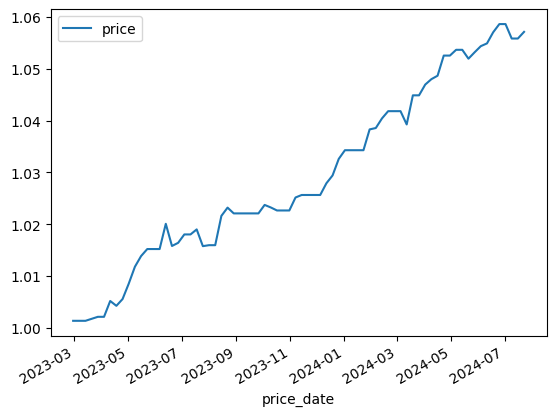

,y_pred,date,10y,10y_next,y_true,ytm_change,price_change,price,price_date
57.0,0,2023-02-21,2.9190,2.9017,0,0.0173,0.1384,1.001384,2023-02-28
58.0,1,2023-02-28,2.9017,2.8726,0,0.0000,0.0000,1.001384,2023-03-07
59.0,1,2023-03-07,2.8726,2.8652,0,0.0000,0.0000,1.001384,2023-03-14
60.0,0,2023-03-14,2.8652,2.8604,0,0.0048,0.0384,1.001769,2023-03-21
61.0,0,2023-03-21,2.8604,2.8556,0,0.0048,0.0384,1.002153,2023-03-28
...,...,...,...,...,...,...,...,...,...
127.0,1,2024-06-25,2.2350,2.2369,1,0.0000,0.0000,1.058603,2024-07-02
128.0,0,2024-07-02,2.2369,2.2698,1,-0.0329,-0.2632,1.055817,2024-07-09
129.0,1,2024-07-09,2.2698,2.2613,0,0.0000,0.0000,1.055817,2024-07-16
130.0,0,2024-07-16,2.2613,2.2461,0,0.0152,0.1216,1.057101,2024-07-23


In [31]:
result['price'] = result['price_change']/100
result['price'] = result['price'].add(1).cumprod()
result['price_date'] = result['date'].shift(-1)
result.iloc[-1, -1] = pd.to_datetime(enddate)
result['price_date'] = pd.to_datetime(result['price_date'])
result.plot(x='price_date', y='price')
plt.show()
result

In [32]:
result.tail(30)

,y_pred,date,10y,10y_next,y_true,ytm_change,price_change,price,price_date
102.0,1,2024-01-02,2.5601,2.4862,0,0.0000,0.0000,1.034280,2024-01-09
103.0,1,2024-01-09,2.4862,2.5252,1,0.0000,0.0000,1.034280,2024-01-16
104.0,1,2024-01-16,2.5252,2.5042,0,0.0000,0.0000,1.034280,2024-01-23
105.0,0,2024-01-23,2.5042,2.4557,0,0.0485,0.3880,1.038293,2024-01-30
106.0,0,2024-01-30,2.4557,2.4525,0,0.0032,0.0256,1.038559,2024-02-06
107.0,0,2024-02-06,2.4525,2.4302,0,0.0223,0.1784,1.040412,2024-02-13
108.0,0,2024-02-13,2.4302,2.4134,0,0.0168,0.1344,1.041810,2024-02-20
109.0,1,2024-02-20,2.4134,2.3809,0,0.0000,0.0000,1.041810,2024-02-27
110.0,1,2024-02-27,2.3809,2.3169,0,0.0000,0.0000,1.041810,2024-03-05
111.0,0,2024-03-05,2.3169,2.3476,1,-0.0307,-0.2456,1.039251,2024-03-12


活跃券

In [33]:
#优化后代码模型跑这个
window = 49
X_train, y_train, X_test, y_pred_dict = EnsembleTrain(window, X_combined,y_train_dataset_bond)
newpred = y_pred_dict.popitem()
evaluatedf = pd.DataFrame(y_pred_dict.values(),index=y_pred_dict.keys(),columns=['y_pred'])
result = pd.merge(evaluatedf, y_bond, left_index=True, right_index=True)
result['ytm_change'] = result['10y_next'] - result['10y']
result['ytm_change'] = result.apply(process_data2, axis=1)
result['price_change'] = result['ytm_change'] * duration
ASR = result['price_change'].mean() / result['price_change'].std() * np.sqrt(52)
print('Window:', window)
print('Annualized Sharpe ratio:', ASR)
print('Out-of-sample accuracy score: {0:0.4f}'.format(accuracy_score(result['y_pred'],result['y_true'])))

Window: 49
Annualized Sharpe ratio: 3.0210153280763796
Out-of-sample accuracy score: 0.6800


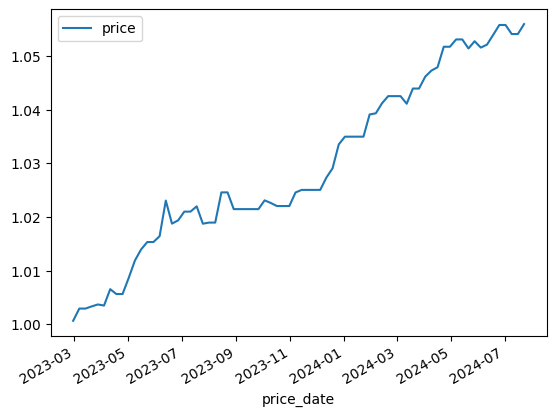

,y_pred,date,10y,code,10y_next,y_true,re,closeday,close_last_rate,open_new_rate,ytm_change,price_change,price,price_date
57.0,0,2023-02-21,2.9190,220025.IB,2.9110,0,0,0,0,0,0.0080,0.064,1.000640,2023-02-28
58.0,0,2023-02-28,2.9110,220025.IB,2.8825,0,0,0,0,0,0.0285,0.228,1.002921,2023-03-07
59.0,1,2023-03-07,2.8825,220025.IB,2.8650,0,0,0,0,0,0.0000,0.000,1.002921,2023-03-14
60.0,0,2023-03-14,2.8650,230004.IB,2.8600,0,0,0,0,0,0.0050,0.040,1.003323,2023-03-21
61.0,0,2023-03-21,2.8600,230004.IB,2.8555,0,0,0,0,0,0.0045,0.036,1.003684,2023-03-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127.0,1,2024-06-25,2.2600,240004.IB,2.2550,0,0,0,0,0,0.0000,0.000,1.055746,2024-07-02
128.0,0,2024-07-02,2.2550,240004.IB,2.2750,1,0,0,0,0,-0.0200,-0.160,1.054057,2024-07-09
129.0,1,2024-07-09,2.2750,240004.IB,2.2630,0,0,0,0,0,0.0000,0.000,1.054057,2024-07-16
130.0,0,2024-07-16,2.2630,240004.IB,2.2410,0,0,0,0,0,0.0220,0.176,1.055912,2024-07-23


In [34]:
result['price'] = 1
result['price'] = result['price_change']/100
result['price'] = result['price'].add(1).cumprod()
result['price_date'] = result['date'].shift(-1)
result.iloc[-1, -1] = pd.to_datetime(enddate)
result['price_date'] = pd.to_datetime(result['price_date'])
result.plot(x='price_date', y='price')
plt.show()
result

In [35]:
# #优化后代码模型跑这个
# for i in range(20,110):
#     window = i
#     X_train, y_train, X_test, y_pred_dict = EnsembleTrain(i, X_combined,y_train_dataset)
#     newpred = y_pred_dict.popitem()                                                                                 
#     evaluatedf = pd.DataFrame(y_pred_dict.values(),index=y_pred_dict.keys(),columns=['y_pred'])
#     result = pd.merge(evaluatedf, y, left_index=True, right_index=True)
#     result['ytm_change'] = result['10y_next'] - result['10y']
#     result['ytm_change'] = result.apply(process_data1, axis=1)
#     result['price_change'] = result['ytm_change'] * duration
#     ASR = result['price_change'].mean() / result['price_change'].std() * np.sqrt(52)
#     result_dict[window] = ASR
    
# window = max(result_dict, key=result_dict.get)
# X_train, y_train, X_test, y_pred_dict = EnsembleTrain(window, X_combined,y_train_dataset)
# newpred = y_pred_dict.popitem()
# evaluatedf = pd.DataFrame(y_pred_dict.values(),index=y_pred_dict.keys(),columns=['y_pred'])
# result = pd.merge(evaluatedf, y, left_index=True, right_index=True)
# result['ytm_change'] = result['10y_next'] - result['10y']
# result['ytm_change'] = result.apply(process_data1, axis=1)
# result['price_change'] = result['ytm_change'] * duration
# ASR = result['price_change'].mean() / result['price_change'].std() * np.sqrt(52)
# print('Window:', window)
# print('Annualized Sharpe ratio:', ASR)
# print('Out-of-sample accuracy score: {0:0.4f}'.format(accuracy_score(result['y_pred'],result['y_true'])))